In [2]:
def plt_img(img):
    plt.figure()
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    plt.show()

In [3]:
def load_and_split_img(path):
    original_image = cv.imread(path, 0)
    height, width = original_image.shape 
    left = np.array(original_image[:, :width//2], copy=True)
    right = np.array(original_image[:, width//2:], copy=True)
    return left, right

In [4]:
left_img, right_img = load_and_split_img('./As3.jpg')

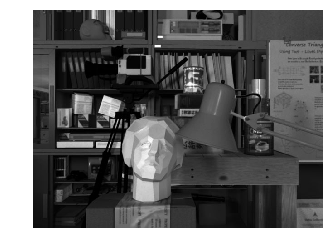

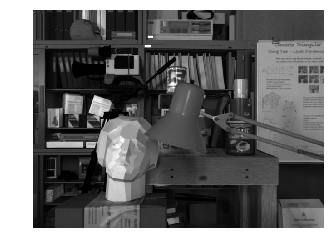

(None, None)

In [5]:
plt_img(left_img), plt_img(right_img)

In [6]:
from tqdm import tqdm as tqdm
def gen_ssd_disparity(left, right, kernel, x_max_offset):
    
    half_kernel = kernel // 2
    h, w = left.shape
    
    ssd_img = np.zeros(left.shape, np.int64)
    disparity_img = np.zeros(left.shape, np.int64)
    offset_adjust = 255 / x_max_offset
    
    for y in tqdm(range(half_kernel, h - half_kernel)):
        
        for x in range(half_kernel, w - half_kernel):
            
            best_offset = 0
            best_ssd = 65534
            
            for offset in range(x_max_offset):
                ssd = 0
                for i in range(-half_kernel, half_kernel):
                    for j in range(-half_kernel, half_kernel):
                            ssd += np.square(int(left[y + i, x + j]) - int(right[y + i, (x + j) - offset]))
                if ssd < best_ssd:
                    best_ssd = ssd
                    best_offset = offset

            ssd_img[y, x] = best_ssd 
            disparity_img[y, x] = best_offset
            
    return ssd_img, disparity_img 

In [7]:
ssd, disparity = gen_ssd_disparity(left_img, right_img, 7, 75)

100%|██████████| 474/474 [29:57<00:00,  3.65s/it]


In [9]:
def scale_between(x, target = 255):
    v = target / np.max(x)
    return v * x

In [12]:
ssd_s, disparity_s = scale_between(ssd), scale_between(disparity)

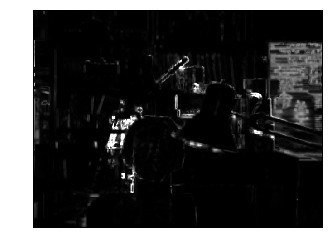

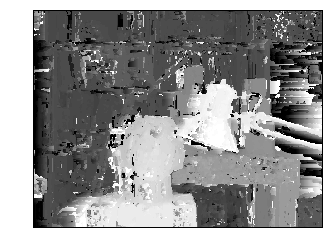

In [17]:
plt_img(ssd_s)
plt_img(disparity_s)

In [16]:
cv.imwrite('ssd.jpg', ssd_s)
cv.imwrite('disparity.jpg', disparity_s)

True